<a href="https://colab.research.google.com/github/Akshay0701/AuctionApp/blob/master/CNNtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip loading_curves.zip

Archive:  loading_curves.zip
  inflating: nocrack_loading_curve_25sample_points.dat  
 extracting: structure_1.png         
 extracting: structure_10.png        
 extracting: structure_100.png       
 extracting: structure_101.png       
 extracting: structure_102.png       
 extracting: structure_103.png       
 extracting: structure_104.png       
 extracting: structure_105.png       
 extracting: structure_106.png       
 extracting: structure_107.png       
 extracting: structure_108.png       
 extracting: structure_109.png       
 extracting: structure_11.png        
 extracting: structure_110.png       
 extracting: structure_111.png       
 extracting: structure_112.png       
 extracting: structure_113.png       
 extracting: structure_114.png       
 extracting: structure_115.png       
 extracting: structure_116.png       
 extracting: structure_117.png       
 extracting: structure_118.png       
 extracting: structure_119.png       
 extracting: structure_12.png        
 e

In [ ]:
!pip install numpy pandas tensorflow scikit-learn pillow


In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from PIL import Image

# Load image data
image_folder = "/content/loadingcurve/"
image_size = (129, 129)
images = []
labels = []

# Load the labels from the .dat file
dat_file = "/content/loadingcurve/nocrack_loading_curve_25sample_points.dat"
labels_data = pd.read_csv(dat_file, sep='\s+', header=None)

labels_data = labels_data.iloc[:, 1:]

print(labels_data)

# Get list of image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(".png")])

# Check if the number of images matches the number of rows in labels_data
if len(image_files) != len(labels_data):
    raise ValueError(f"Mismatch between number of images ({len(image_files)}) and number of labels ({len(labels_data)}). Please ensure they match.")

# Loop through the image files and load them
for idx, filename in enumerate(image_files):
    img_path = os.path.join(image_folder, filename)
    img = Image.open(img_path).convert("L")  # Convert image to grayscale
    img = img.resize(image_size)
    img_array = np.array(img) / 255.0  # Normalize image
    images.append(img_array)
    labels.append(labels_data.iloc[idx].values)

# Convert images and labels to numpy arrays
images = np.array(images).reshape(-1, image_size[0], image_size[1], 1)
labels = np.array(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Input(shape=(image_size[0], image_size[1], 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='linear')  # 26 output features
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=8)

# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation MAE: {val_mae}")

# Function to predict features for a new test image
def predict_features(model, image_path):
    img = Image.open(image_path).convert("L")  # Convert image to grayscale
    img = img.resize(image_size)
    img_array = np.array(img) / 255.0  # Normalize image
    img_array = img_array.reshape(1, image_size[0], image_size[1], 1)  # Reshape for model input

    prediction = model.predict(img_array)
    return prediction[0]

# Example usage of the prediction function
test_image_path = "/content/loadingcurve/structure_1.png"
predicted_features = predict_features(model, test_image_path)
print(len(predicted_features))
print(f"Predicted Features for Test Image: {predicted_features}")


           1         2         3         4         5         6         7   \
0   -0.104278  0.071410  0.422752  0.771825  1.091638  1.382615  1.649354   
1   -0.106067  0.062571  0.356488  0.649103  0.919134  1.167640  1.395839   
2   -0.103237  0.052267  0.334321  0.610795  0.862775  1.093115  1.302792   
3   -0.118170  0.059642  0.332358  0.604612  0.854664  1.083798  1.294553   
4   -0.105438  0.065843  0.353536  0.638457  0.898793  1.136364  1.353055   
..        ...       ...       ...       ...       ...       ...       ...   
155 -0.108108  0.056263  0.312011  0.555391  0.775443  0.976188  1.159361   
156 -0.122466  0.059515  0.352936  0.642459  0.908868  1.152939  1.377559   
157 -0.133896  0.056114  0.314848  0.559305  0.781633  0.985699  1.172552   
158 -0.119723  0.060760  0.340350  0.615733  0.867952  1.100494  1.315226   
159 -0.122505  0.054016  0.319743  0.580810  0.817698  1.038549  1.242919   

           8         9         10  ...        17        18        19  \
0  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

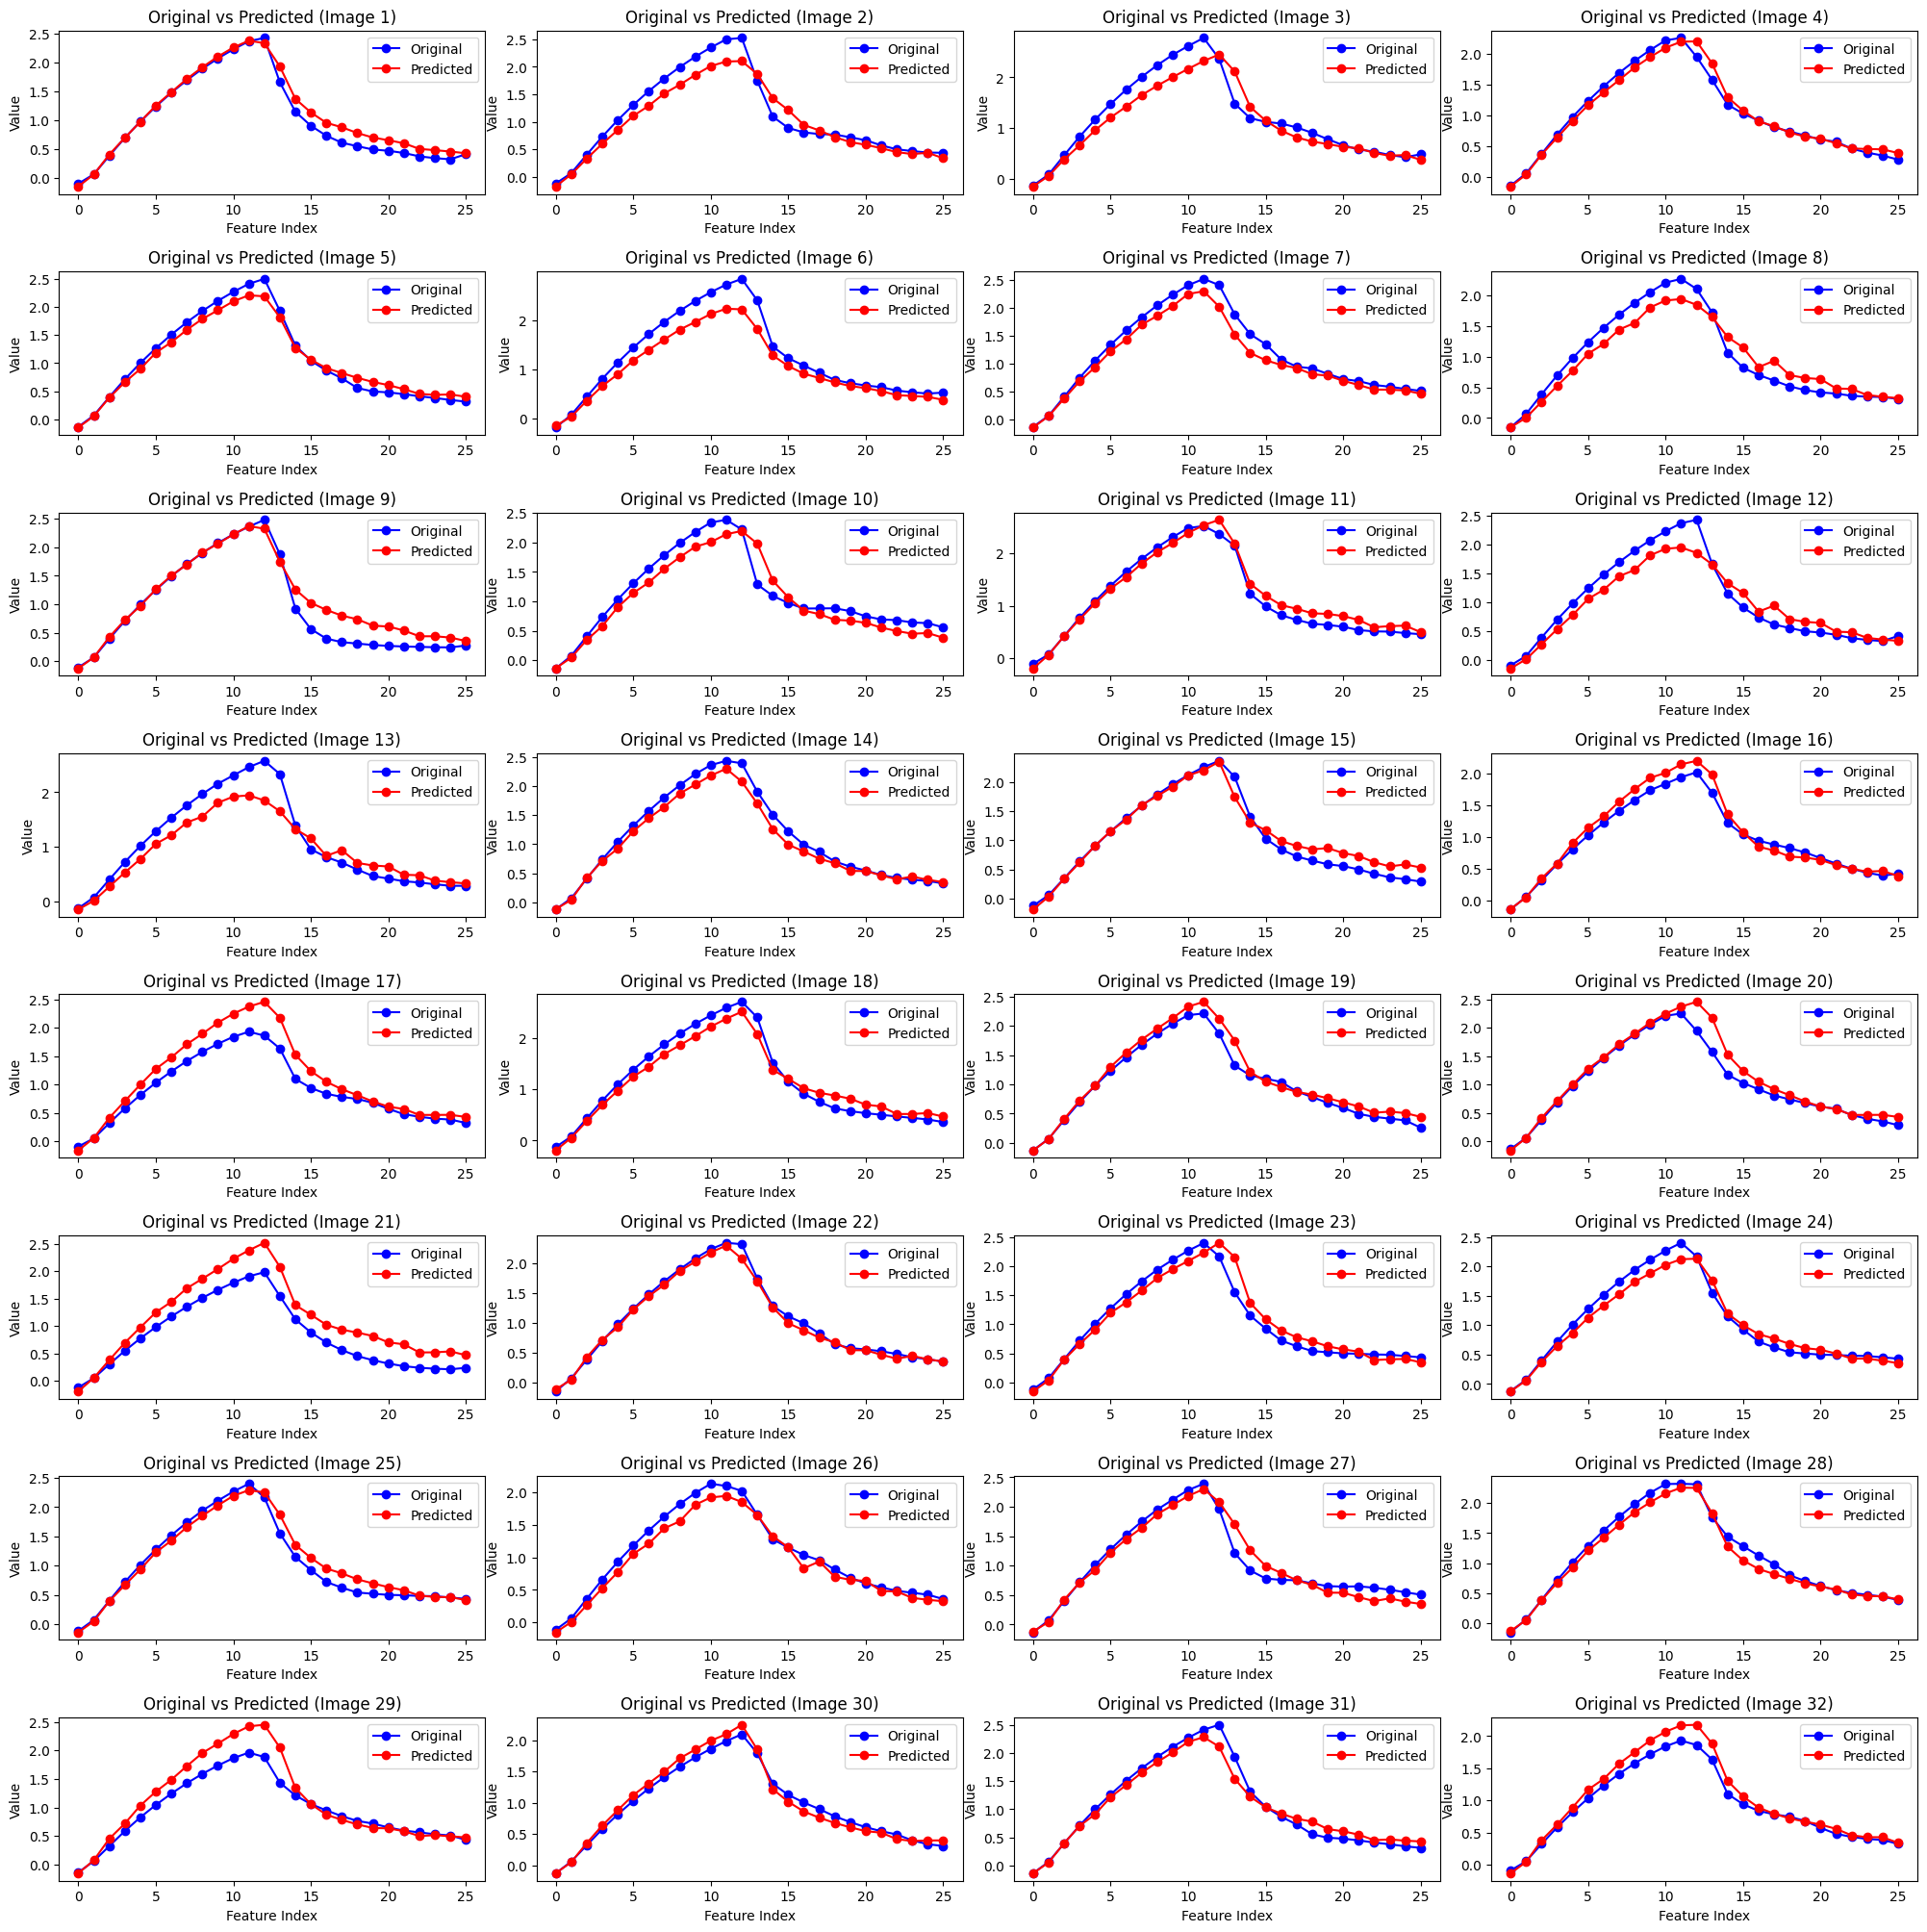

In [2]:
import matplotlib.pyplot as plt

# Function to test the model on multiple images from the validation set
def test_model(model, X_val, y_val, num_samples=32):
    # Randomly select `num_samples` images from the validation set
    idxs = np.random.choice(len(X_val), num_samples, replace=False)

    # Dynamically calculate rows based on number of samples
    rows = (num_samples + 3) // 4  # 4 images per row

    # Plotting the images along with their original and predicted values
    plt.figure(figsize=(20, rows * 5))
    for i, idx in enumerate(idxs):
        img = X_val[idx]
        true_values = y_val[idx]
        predicted_values = model.predict(img.reshape(1, image_size[0], image_size[1], 1))[0]

        # Display the original and predicted values
        plt.subplot(rows * 2, 4, i + num_samples + 1)
        plt.plot(range(26), true_values, 'bo-', label='Original')
        plt.plot(range(26), predicted_values, 'ro-', label='Predicted')
        plt.title(f"Original vs Predicted (Image {i+1})")
        plt.xlabel('Feature Index')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Test the model using the function
test_model(model, X_val, y_val, num_samples=32)


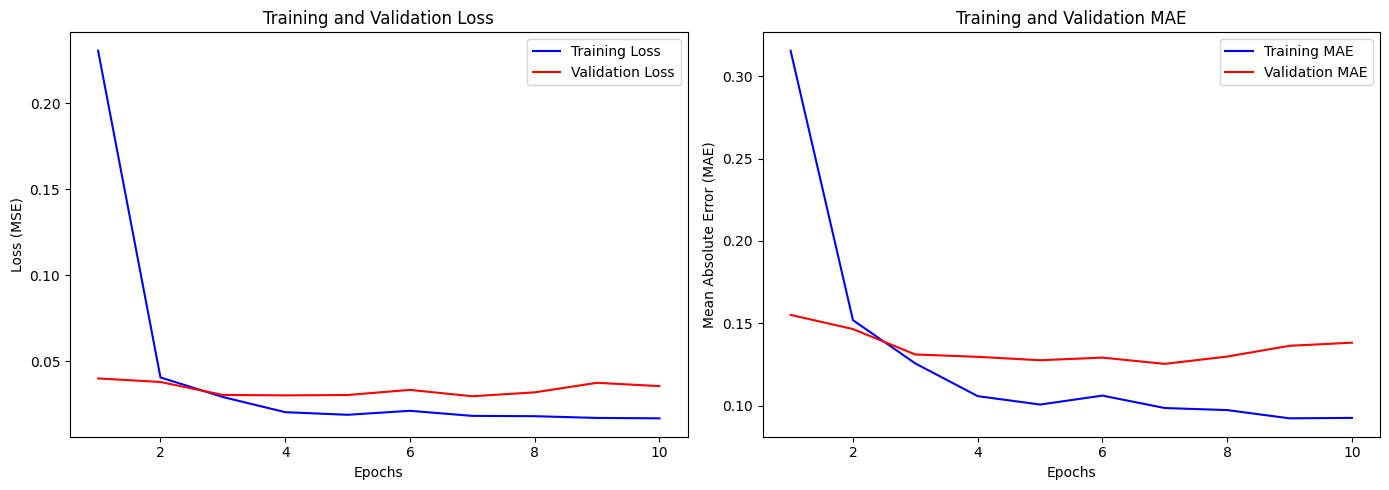

In [3]:
import matplotlib.pyplot as plt

# Function to plot the training history of the model
def plot_training_history(history):
    # Extract loss and mean absolute error from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mae = history.history['mae']
    val_mae = history.history['val_mae']

    # Plotting Loss
    plt.figure(figsize=(14, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(loss) + 1), loss, 'b-', label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, 'r-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Validation Loss')
    plt.legend()

    # MAE Plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(mae) + 1), mae, 'b-', label='Training MAE')
    plt.plot(range(1, len(val_mae) + 1), val_mae, 'r-', label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Training and Validation MAE')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot model training performance
plot_training_history(history)



# CNN + LSMT

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 127, 127, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 196, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 196, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,306 (692.60 KB)

 Trainable params: 177,050 (691.60 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - loss: 0.9256 - mae: 0.7428 - val_loss: 0.1790 - val_mae: 0.2979
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 466ms/step - loss: 0.0731 - mae: 0.1946 - val_loss: 0.0290 - val_mae: 0.1254
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 473ms/step - loss: 0.0342 - mae: 0.1359 - val_loss: 0.0265 - val_mae: 0.1223
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - loss: 0.0259 - mae: 0.1177 - val_loss: 0.0290 - val_mae: 0.1277
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 401ms/step - loss: 0.0275 - mae: 0.1192 - val_loss: 0.0264 - val_mae: 0.1221
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 469ms/step - loss: 0.0240 - mae: 0.1143 - val_loss: 0.0260 - val_mae: 0.1212
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - loss: 0.0239 - mae: 0.1142 - val_loss: 0.0287 - val_mae: 0.1269
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - loss: 0.0242 - mae: 0.1129 - val_loss: 0.0261 - val_mae: 0.1201
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s

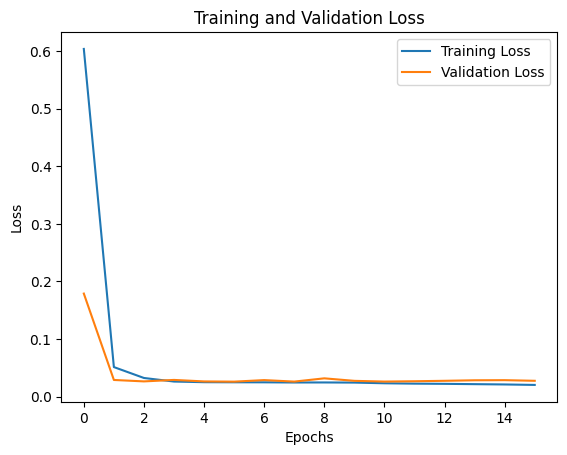

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


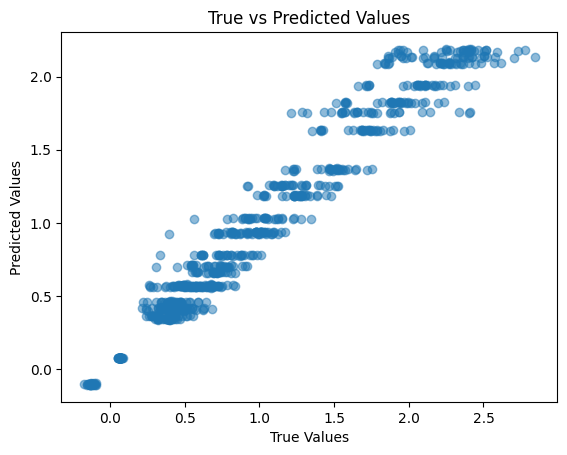

In [6]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, LSTM, Reshape, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


# Load image data
image_folder = "/content/loadingcurve/"
image_size = (129, 129)
images = []
labels = []

# Load the labels from the .dat file
dat_file = "/content/loadingcurve/nocrack_loading_curve_25sample_points.dat"
labels_data = pd.read_csv(dat_file, sep='\s+', header=None)

# Remove the first column from the labels data (assuming you want to skip the first feature)
labels_data = labels_data.iloc[:, 1:]

# Get list of image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(".png")])

# Check if the number of images matches the number of rows in labels_data
if len(image_files) != len(labels_data):
    raise ValueError(f"Mismatch between number of images ({len(image_files)}) and number of labels ({len(labels_data)}). Please ensure they match.")

# Loop through the image files and load them
for idx, filename in enumerate(image_files):
    img_path = os.path.join(image_folder, filename)
    img = Image.open(img_path).convert("L")  # Convert image to grayscale
    img = img.resize(image_size)
    img_array = np.array(img) / 255.0  # Normalize image
    images.append(img_array)
    labels.append(labels_data.iloc[idx].values)

# Convert images and labels to numpy arrays
images = np.array(images).reshape(-1, image_size[0], image_size[1], 1)
labels = np.array(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the CNN+LSTM model
model = Sequential([
    Input(shape=(image_size[0], image_size[1], 1)),

    # Convolutional layers for feature extraction
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten the output
    Flatten(),

    # Adjust the reshaped size to match the output from Flatten (which is 25,088)
    Reshape((196, 128)),  # Use 196 timesteps and 128 features as it matches 25,088 elements

    # LSTM layer to capture sequential dependencies
    LSTM(64, return_sequences=True),  # Output entire sequence
    LSTM(64, return_sequences=False),  # Output only final state

    # Fully connected output layer
    Dense(26, activation='linear')  # Predicting 26 output features
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Display the model summary to verify the architecture
model.summary()

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping, up to 100 epochs
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=8, callbacks=[early_stopping])

# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation MAE: {val_mae}")

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the true vs predicted values for the validation set
y_pred = model.predict(X_val)
plt.scatter(y_val.flatten(), y_pred.flatten(), alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━

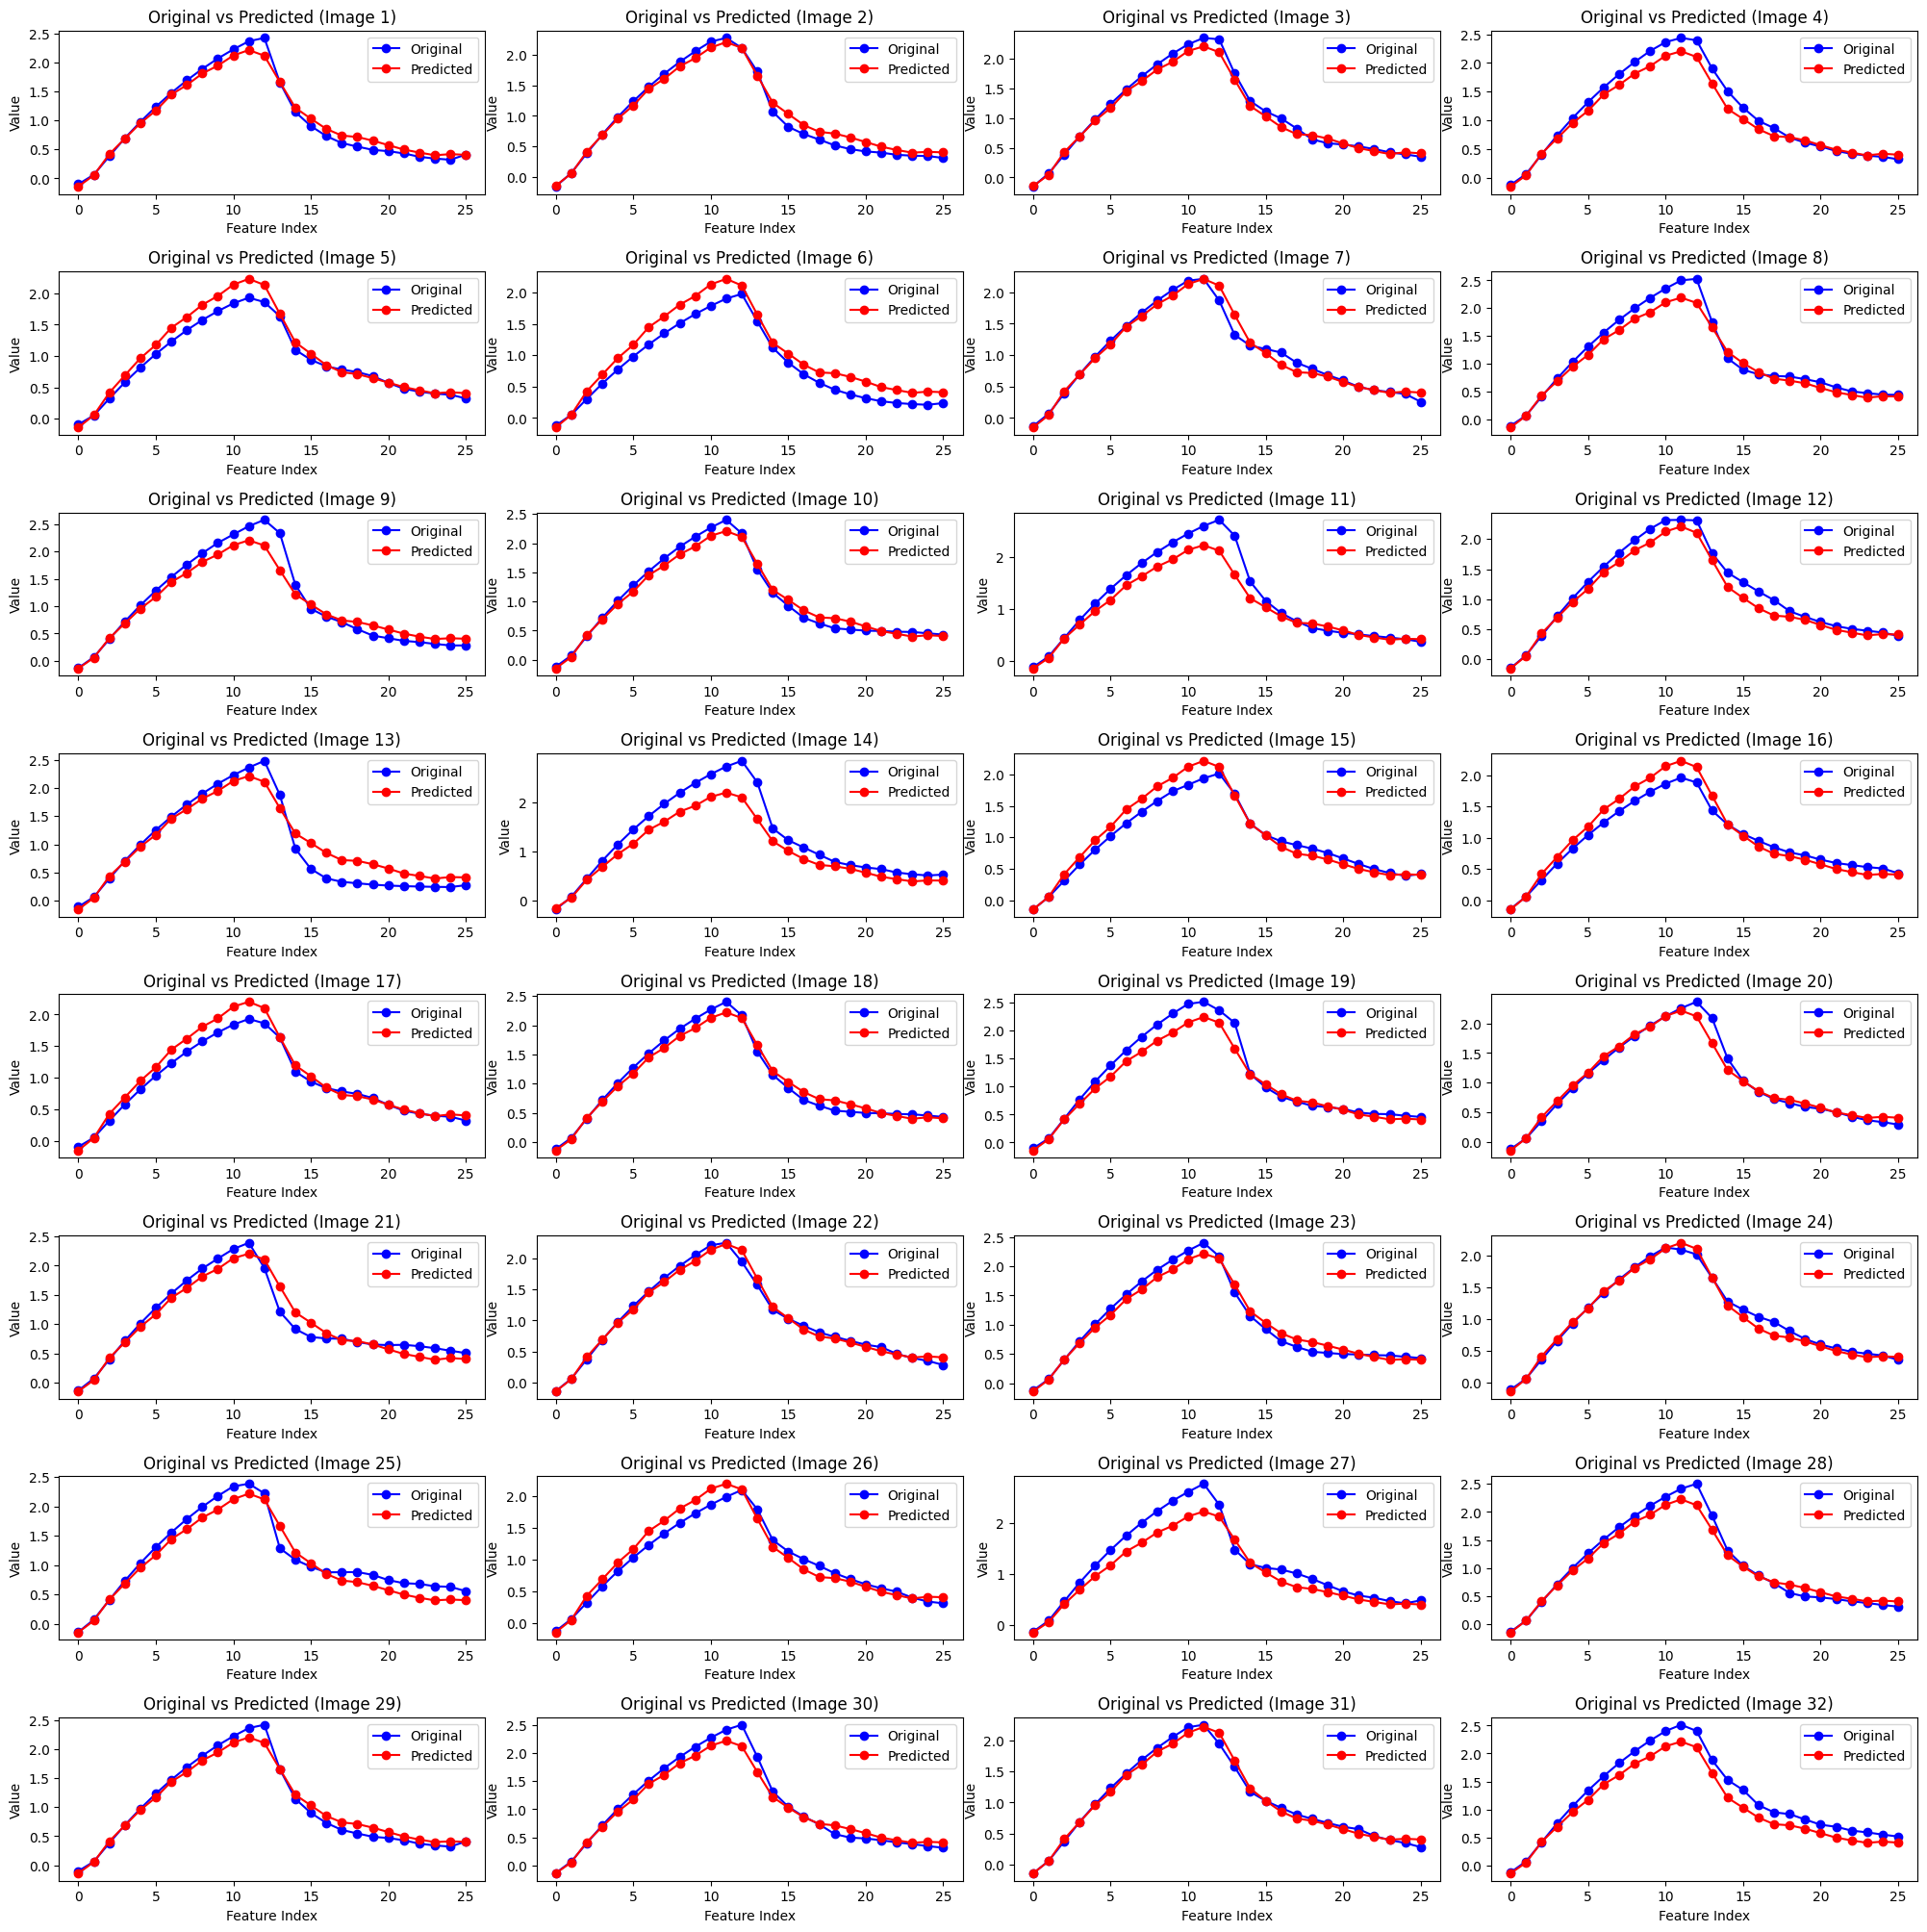

In [ ]:
import matplotlib.pyplot as plt

# Function to test the model on multiple images from the validation set
def test_model(model, X_val, y_val, num_samples=32):
    # Randomly select `num_samples` images from the validation set
    idxs = np.random.choice(len(X_val), num_samples, replace=False)

    # Dynamically calculate rows based on number of samples
    rows = (num_samples + 3) // 4  # 4 images per row

    # Plotting the images along with their original and predicted values
    plt.figure(figsize=(20, rows * 5))
    for i, idx in enumerate(idxs):
        img = X_val[idx]
        true_values = y_val[idx]
        predicted_values = model.predict(img.reshape(1, image_size[0], image_size[1], 1))[0]

        # Display the original and predicted values
        plt.subplot(rows * 2, 4, i + num_samples + 1)
        plt.plot(range(26), true_values, 'bo-', label='Original')
        plt.plot(range(26), predicted_values, 'ro-', label='Predicted')
        plt.title(f"Original vs Predicted (Image {i+1})")
        plt.xlabel('Feature Index')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Test the model using the function
test_model(model, X_val, y_val, num_samples=32)


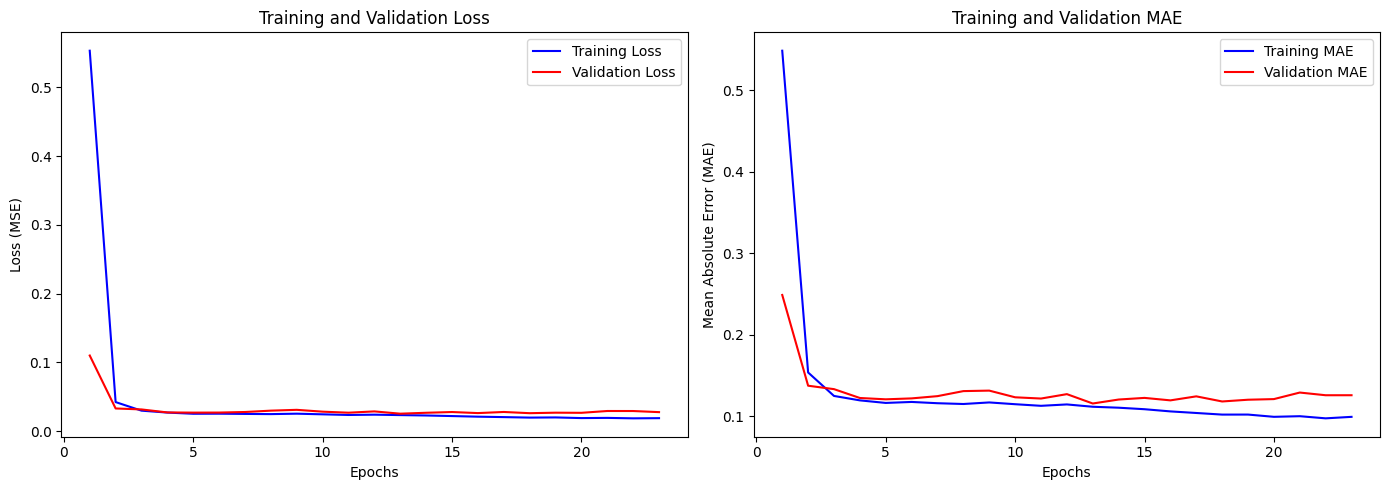

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the training history of the model
def plot_training_history(history):
    # Extract loss and mean absolute error from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mae = history.history['mae']
    val_mae = history.history['val_mae']

    # Plotting Loss
    plt.figure(figsize=(14, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(loss) + 1), loss, 'b-', label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, 'r-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Validation Loss')
    plt.legend()

    # MAE Plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(mae) + 1), mae, 'b-', label='Training MAE')
    plt.plot(range(1, len(val_mae) + 1), val_mae, 'r-', label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Training and Validation MAE')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot model training performance
plot_training_history(history)


Test3


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 196, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 196, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,306 (692.60 KB)

 Trainable params: 177,050 (691.60 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 616ms/step - loss: 0.1947 - mae: 0.3771 - val_loss: 0.1604 - val_mae: 0.3464 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 600ms/step - loss: 0.0500 - mae: 0.1778 - val_loss: 0.0744 - val_mae: 0.2272 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 757ms/step - loss: 0.0430 - mae: 0.1711 - val_loss: 0.0631 - val_mae: 0.2085 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 562ms/step - loss: 0.0426 - mae: 0.1662 - val_loss: 0.0584 - val_mae: 0.1997 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 821ms/step - loss: 0.0435 - mae: 0.1660 - val_loss: 0.0563 - val_mae: 0.1958 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 648ms/step - loss: 0.0424 - mae: 0.1651 - val_loss: 0.0554 - val_mae: 0.1947 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 829ms/step - loss: 0.0431 - mae: 0.1674 - val_loss: 0.0553 - val_mae: 0.1943 - learning_rate: 0.0010
Epoch 8/100


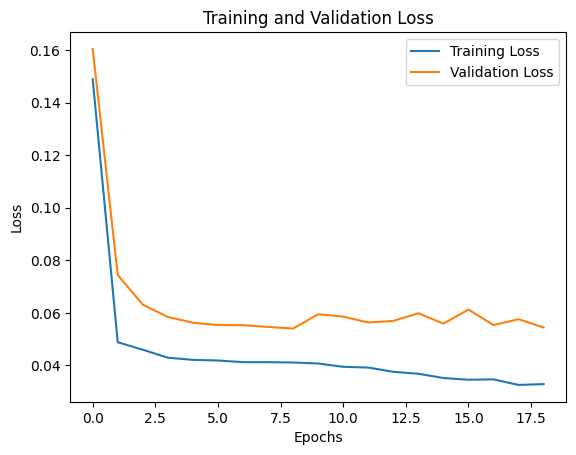

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


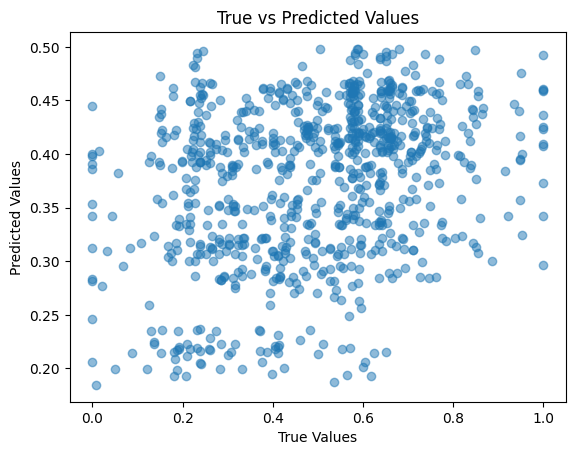

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, LSTM, Reshape, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load image data
image_folder = "/content/loadingcurve/"
image_size = (129, 129)
images = []
labels = []

# Load the labels from the .dat file
dat_file = "/content/loadingcurve/nocrack_loading_curve_25sample_points.dat"
labels_data = pd.read_csv(dat_file, sep='\s+', header=None)

# Remove the first column from the labels data (assuming you want to skip the first feature)
labels_data = labels_data.iloc[:, 1:]

# Normalize the labels between 0 and 1
labels_data = (labels_data - labels_data.min()) / (labels_data.max() - labels_data.min())

# Get list of image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(".png")])

# Check if the number of images matches the number of rows in labels_data
if len(image_files) != len(labels_data):
    raise ValueError(f"Mismatch between number of images ({len(image_files)}) and number of labels ({len(labels_data)}). Please ensure they match.")

# Loop through the image files and load them
for idx, filename in enumerate(image_files):
    img_path = os.path.join(image_folder, filename)
    img = Image.open(img_path).convert("L")  # Convert image to grayscale
    img = img.resize(image_size)
    img_array = np.array(img) / 255.0  # Normalize image
    images.append(img_array)
    labels.append(labels_data.iloc[idx].values)

# Convert images and labels to numpy arrays
images = np.array(images).reshape(-1, image_size[0], image_size[1], 1)
labels = np.array(labels)

# Assign sample weights based on the maximum value points
def compute_sample_weights(labels, max_weight=10):
    """
    Assign weights to samples. Maximum values get larger weights.
    :param labels: The label array
    :param max_weight: Weight assigned to the maximum points
    :return: Sample weights
    """
    max_indices = np.argmax(labels, axis=1)
    sample_weights = np.ones_like(labels)
    for i, idx in enumerate(max_indices):
        sample_weights[i, idx] = max_weight
    return sample_weights

# Compute sample weights
sample_weights = compute_sample_weights(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val, sw_train, sw_val = train_test_split(
    images, labels, sample_weights, test_size=0.2, random_state=42
)

# Build the CNN+LSTM model
model = Sequential([
    Input(shape=(image_size[0], image_size[1], 1)),

    # Convolutional layers for feature extraction
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Dropout to prevent overfitting

    # Flatten the output
    Flatten(),

    # Adjust the reshaped size to match the output from Flatten (which is dynamic)
    Reshape((-1, 128)),  # Reshape to sequence format (timesteps, features)

    # LSTM layer to capture sequential dependencies
    LSTM(64, return_sequences=True),  # Output entire sequence
    LSTM(64, return_sequences=False),  # Output only final state

    # Fully connected output layer
    Dense(26, activation='linear')  # Predicting 26 output features
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Display the model summary to verify the architecture
model.summary()

# Set up early stopping to avoid overfitting and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train the model with early stopping and learning rate scheduler
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    batch_size=16,
    sample_weight=sw_train.flatten(),
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation MAE: {val_mae}")

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the true vs predicted values for the validation set
y_pred = model.predict(X_val)
plt.scatter(y_val.flatten(), y_pred.flatten(), alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


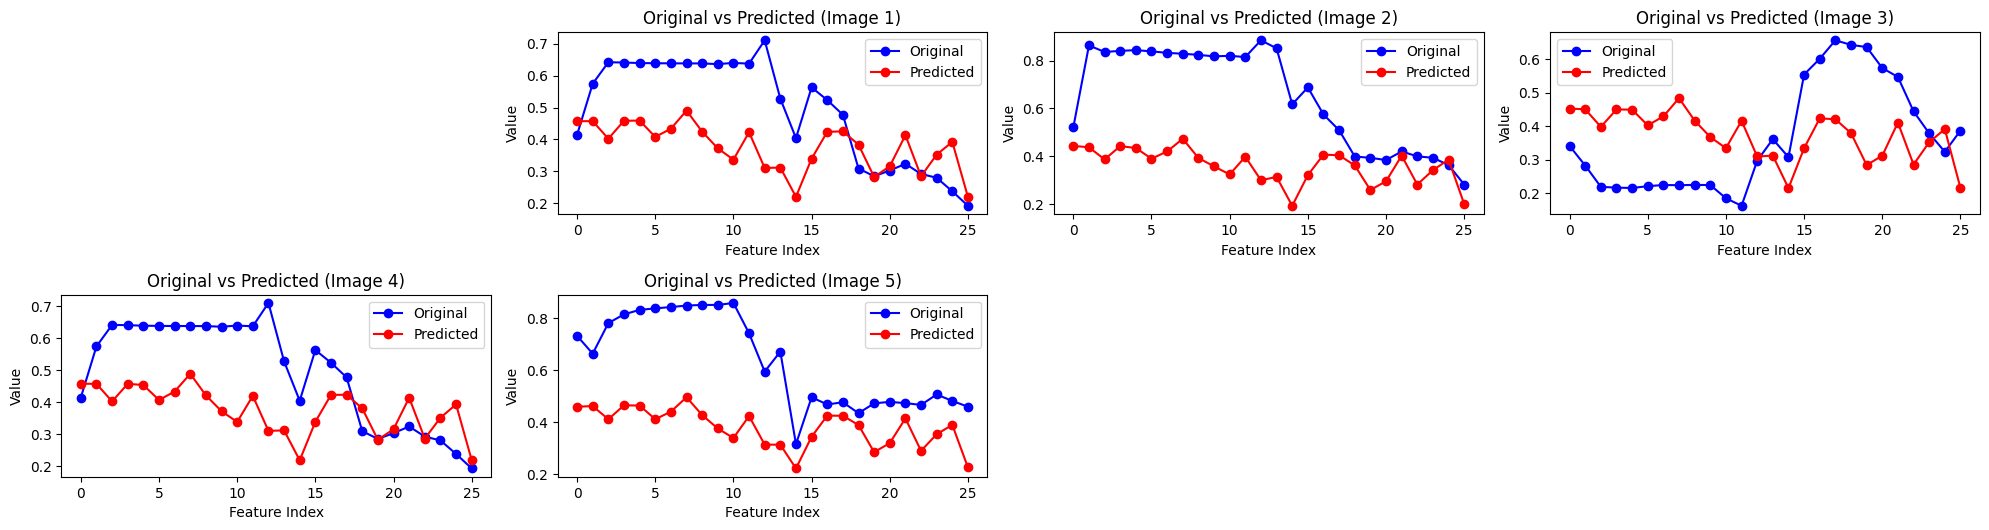

In [5]:
import matplotlib.pyplot as plt

# Function to test the model on multiple images from the validation set
def test_model(model, X_val, y_val, num_samples=32):
    # Randomly select `num_samples` images from the validation set
    idxs = np.random.choice(len(X_val), num_samples, replace=False)

    # Dynamically calculate rows based on number of samples
    rows = (num_samples + 3) // 4  # 4 images per row

    # Plotting the images along with their original and predicted values
    plt.figure(figsize=(20, rows * 5))
    for i, idx in enumerate(idxs):
        img = X_val[idx]
        true_values = y_val[idx]
        predicted_values = model.predict(img.reshape(1, image_size[0], image_size[1], 1))[0]

        # Display the original and predicted values
        plt.subplot(rows * 2, 4, i + num_samples + 1)
        plt.plot(range(26), true_values, 'bo-', label='Original')
        plt.plot(range(26), predicted_values, 'ro-', label='Predicted')
        plt.title(f"Original vs Predicted (Image {i+1})")
        plt.xlabel('Feature Index')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Test the model using the function
test_model(model, X_val, y_val, num_samples=5)
